# Encontrando valores atípicos utilizando k-NN

### ¿Eliminar o mantener los valores atípicos?
La mayoría de las veces, como hemos visto hasta ahora, es recomendable eliminar los valores atípicos (outliers). Sin embargo, esto no es siempre correcto. Hay veces que tenemos variables independientes que capturan lo que hace a un valor atípico "atípico", entonces las estimaciones de los parámetros para las otras variables independientes son menos vulnerables a la distorsión. Para esto podemos considerar transformaciones, una transformación particular, es la transformación logarítmica [que vieron en la segunda parte de la clase del profesor Osvaldo Yañez](https://colab.research.google.com/drive/1p0l47bkLlPag6ujV-OcYnOaCjbYchZxt?usp=sharing).

Esta cápsula y la siguiente presentaran dos tipos de transformaciones de escala.   
  
_Una transformación adecuada, es decir, acorde a nuestros datos, puede reducir la influencia de los valores atípicos al limitar el tamaño de los residuos en los extremos_. 
  
Antes de ver las transformaciones de escalas introduciremos los 2 tipos de aprendizaje de máquina.


### Tipos de aprendizaje de máquina

Según [Kevin Murphy](http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf), podemos decir que el aprendizaje de máquina se divide en 2 tipos principales.
1. **El aprendizaje predictivo o supervisado**: donde la idea es aprender a mapear una entrada $x$ a una salida $y$, dado un conjunto de pares entrada-salida $D={(x_{i},y_{i})}_{i=1}^N$ Donde $D$ es el conjunto de **entrenamiento** y $N$ es el número de ejemplos de entrenamiento. En su configuración más simple, cada entrada de entrenamiento $x_{i}$ corresponde a un vector númerico $D-$dimensional. Un ejemplo puede ser, el sexo, peso, altura y edad de una persona. Estos son llamados **características**, **atributos** o **covariables** y se presentan generalmente como una matriz de $N x D$. Por ejemplo, en la siguiente tabla las _columnas_ corresponden a los _atributos_ ($D$) y las _filas_ corresponden a los _casos_  ($N$). Entonces podemos decir que cada _fila$_{i}$_ corresponde a un vector de características $x_{i}$.


|Sexo|Peso (Kg)|Altura( cms)|Edad|
|:---|:--------|:-----------|:---|
|M|66|172|20|
|M|91|180|35|
|F|52|166|22|
|F|55|160|31|



2. **El aprendizaje descriptivo o no supervisado**: donde solo tenemos un conjunto de datos de salida sin ninguna entrada, es decir, $D={(x_{i})}_{i=1}^N$. El objetivo es encontrar una _estructura interesante_ o un _patrón_ en los datos. También se llama **descubrimiento del conocimiento**. Este no es un problema bien definido porque no sabemos lo que podemos encontrar, ni que tipo de _patrón_ estamos buscando. En el **aprendizaje supervisado**, podemos comparar y ver que tan distante esta nuestra predicción del valor observado. Mientras que en **aprendizaje no supervisado** no es trivial definir una métrica de error.






### KNN también llamado k-NN

El algoritmo **k-NN** (k-nearest neighbors) llamado en español k-vecinos cercanos, es un método de aprendizaje automático **supervisado**, **no paramétrico** que se utiliza para clasificar objetos basándose en la _similitud_ entre ellos. El algoritmo funciona de la siguiente manera:

1. Se selecciona un número entero $k$, que representa el número de vecinos más cercanos a considerar.  


2. Se toma un objeto desconocido y se calcula su distancia con respecto a todos los objetos en el conjunto de datos de entrenamiento.  


3. Se seleccionan los $k$ objetos más cercanos y se determina la clase predominante entre ellos. La clase predominante será la clase asignada al objeto desconocido.  


En resumen, el algoritmo k-NN clasifica un objeto desconocido basándose en la clase predominante entre los $k$ objetos más cercanos en el conjunto de entrenamiento.


### ¿Cómo se utiliza k-NN para detectar outliers?
  
Este algoritmo también es utilizado para detectar valores atípicos en un conjunto de datos. Si nos fijamos en la descripción del algoritmo se hacen algunas modificaciones, sin embargo, la naturaleza del problema es la misma. La idea básica es que un valor atípico es aquel que tiene pocos vecinos cercanos. 

El proceso para detectar outliers es el siguiente:

1. Se selecciona un número entero $k$, que representa el número de vecinos más cercanos a considerar.  


2. Se calcula la distancia de cada punto del conjunto de datos con respecto a los demás puntos.  


3. Se determina el número de vecinos más cercanos de cada punto y se almacena en una nueva característica.  


4. Se seleccionan los puntos con el menor número de vecinos más cercanos. Estos puntos son considerados como outliers o valores atípicos.  


❗️ _Es importante tener en cuenta que el número $k$ es un factor crítico en este proceso. Un $k$ **demasiado pequeño** puede resultar en la detección de **falsos valores atípicos**. Por otra parte, un $k$ **demasiado grande** puede **no detectar valores atípicos**. Por lo tanto, es necesario buscar un equilibrio adecuado al seleccionar el valor $k$._






Vamos a partir instalando un paquete que se utiliza para la detección de valores atípicos.
`PyOD` (**Py**thon **O**utliers **D**etection) 

In [1]:
! pip install pyod

     |████████████████████████████████| 147 kB 4.6 MB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181093 sha256=8dd06f6f8dd4a6529086ae9d676755e9af1e71eee81128692e3e78858d5c7402
  Stored in directory: /home/dtravisany/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


También instalaramos `scikit-learn`

In [2]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2343 sha256=9265d40b6c935bce8ab860fd4027c63324285c309aa41c86ef11a70273e4913a
  Stored in directory: /home/dtravisany/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


Partimos importando paquetes:

In [4]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler

In [6]:
covid = pd.read_csv("data/covidtotals.csv")
covid.set_index("iso_code", inplace=True)

In [7]:
covid.head()

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


In [9]:
covid.columns

Index(['lastdate', 'location', 'total_cases', 'total_deaths', 'total_cases_pm',
       'total_deaths_pm', 'population', 'pop_density', 'median_age',
       'gdp_per_capita', 'hosp_beds'],
      dtype='object')

In [10]:
# Vamos a estandarizar nuestros datos
estandarizador=StandardScaler()

cols_de_interes=['location', 'total_cases_pm','total_deaths_pm','pop_density','median_age', 'gdp_per_capita']
covid_analisis= covid.loc[:,  cols_de_interes ].dropna()


In [11]:
covid_std= estandarizador.fit_transform(covid_analisis.iloc[:,1:])

Vamos a utilizar el modelo k-NN de nuestro paquete PyOD y generaremos los puntajes de anomalía.
Para familiarizarnos con el paquete revisaremos su [documentación](http://pyod.readthedocs.io).
Vamos a utilizar un valor arbitrario para la contación, que corresponde a la cantidad o proporción de outliers en el conjunto de datos. En nuestro caso, partiremos con un valor de 0.1.

In [12]:
nombre_clase = 'KNN'
modelo = KNN(contamination=0.1)
modelo.fit(covid_std)
pred_y= modelo.labels_
score_y = modelo.decision_scores_

In [13]:
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [14]:
score_y

array([0.15961874, 0.43272345, 0.25485372, 0.21110421, 0.46354369,
       0.34124629, 0.96256589, 0.73642288, 0.89627146, 0.90160081,
       0.36907956, 0.52870745, 2.84290649, 1.16286045, 0.76904732,
       1.42254144, 3.54482656, 0.23277344, 0.10167483, 0.18527261,
       0.40072751, 0.53992537, 0.36917245, 0.9617941 , 1.92084043,
       0.53715561, 0.12258914, 0.32685562, 0.24534376, 0.11533885,
       1.15609504, 0.34503345, 0.13977562, 0.14058587, 1.24823227,
       0.46905303, 0.38663041, 0.41487952, 0.15985191, 0.31374873,
       0.12664621, 0.34711841, 0.59877733, 0.42992558, 0.12831025,
       0.97637002, 1.23138657, 0.70966615, 1.32324358, 0.2855322 ,
       0.35521492, 0.77473635, 0.09284947, 0.46427915, 0.08737206,
       0.17255871, 0.62299851, 1.85749868, 0.60940527, 0.19650207,
       0.38845527, 1.06789348, 0.21625142, 0.41063736, 0.38844834,
       0.26705335, 0.12250907, 0.26745235, 0.24030004, 0.4330579 ,
       0.28722595, 7.7717216 , 0.35399762, 1.57733317, 0.45770

In [25]:
prediccion= pd.DataFrame(zip(pred_y,score_y), columns=["tipo","score"], index=covid_analisis.index)

In [26]:
prediccion.head(15)

,tipo,score
iso_code,,
AFG,0,0.159619
ALB,0,0.432723
DZA,0,0.254854
AGO,0,0.211104
ATG,0,0.463544
ARG,0,0.341246
ARM,0,0.962566
ABW,0,0.736423
AUS,0,0.896271


In [22]:
prediccion.tipo.value_counts()

0    157
1     18
Name: tipo, dtype: int64

In [27]:
prediccion.sample(10, random_state=1)


,tipo,score
iso_code,,
LBY,0,0.367532
NLD,1,1.564052
BTN,0,0.185273
HTI,0,0.433058
EST,0,0.464279
LCA,0,0.431069
PER,0,1.411336
BRB,0,0.769047
MDA,0,0.912486


In [28]:
prediccion.sample(10, random_state=2)

,tipo,score
iso_code,,
BHR,1,2.842906
BRA,0,0.961794
UGA,0,0.236686
BGR,0,0.537156
CHN,0,0.469053
BGD,0,1.162860
GRD,0,0.388448
QAT,1,8.001605
PRT,0,1.236215


In [30]:
prediccion.groupby(["tipo"])[["score"]].agg(['min','median', 'max'])

score                    
           min    median       max
tipo                              
0     0.081259  0.364803  1.519804
1     1.553681  2.096079  9.483549

In [91]:
df_sorted=covid_analisis.join(prediccion).loc[prediccion.tipo==1,\
                                    ['location','total_cases_pm','total_deaths_pm','score' \
                                    ]].sort_values(['score'],ascending=False)


df_sorted_complete = covid_analisis.join(prediccion).loc[prediccion.tipo>=0,\
                                    ['location','total_cases_pm','total_deaths_pm','score' \
                                    ]].sort_values(['score'],ascending=False)

In [69]:
df_sorted

,location,total_cases_pm,total_deaths_pm,score
iso_code,,,,
SGP,Singapore,5962.727,3.931,9.483549
QAT,Qatar,19753.146,13.190,8.001605
HKG,Hong Kong,0.000,0.000,7.771722
BEL,Belgium,5037.354,816.852,3.544827
BHR,Bahrain,6698.468,11.166,2.842906
LUX,Luxembourg,6418.776,175.726,2.442886
ESP,Spain,5120.952,580.197,2.176441
KWT,Kuwait,6332.420,49.642,2.127519
GBR,United Kingdom,4047.403,566.965,2.103458


In [70]:
import matplotlib.pyplot as plt

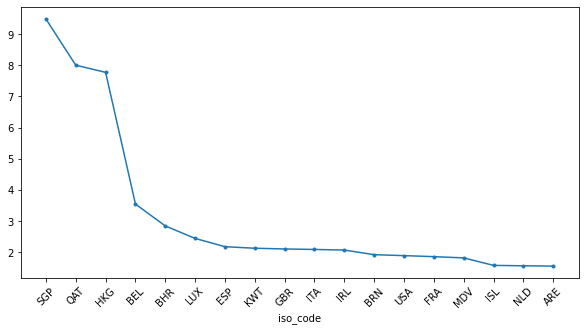

In [107]:
ax = df_sorted.score.plot(figsize=(10,5), style='.-' , rot=45)
xticks=df_sorted.index
plt.xticks(range(0,len(df_sorted.index)),df_sorted.index)
plt.show()

<AxesSubplot:xlabel='iso_code'>

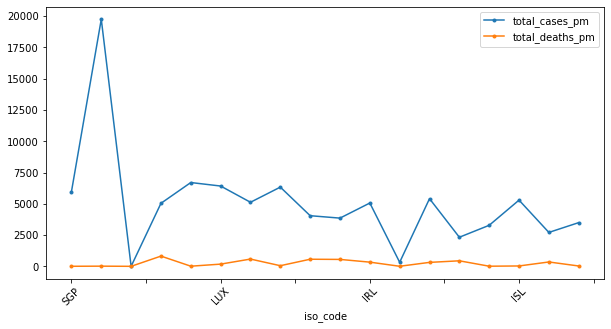

In [99]:
df_sorted[['total_cases_pm','total_deaths_pm']].plot(figsize=(10,5), style='.-' , rot=45)

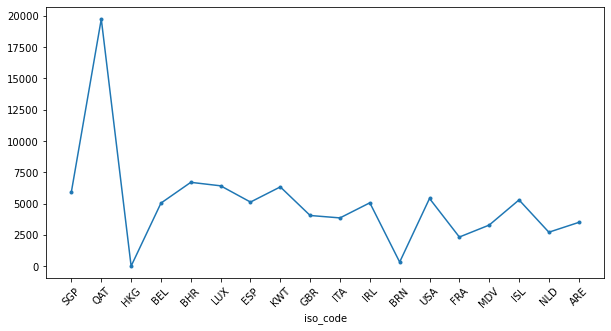

In [109]:
df_sorted.total_cases_pm.plot(figsize=(10,5), style='.-' , rot=45)
plt.xticks(range(0,len(df_sorted.index)),df_sorted.index)
plt.show()

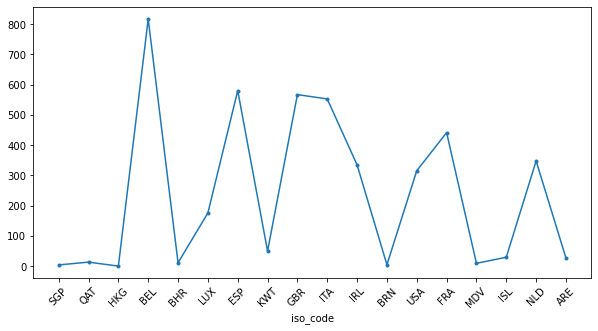

In [105]:
df_sorted.total_deaths_pm.plot(figsize=(10,5), style='.-' , rot=45)
plt.xticks(range(0,len(df_sorted.index)),df_sorted.index)
plt.show()

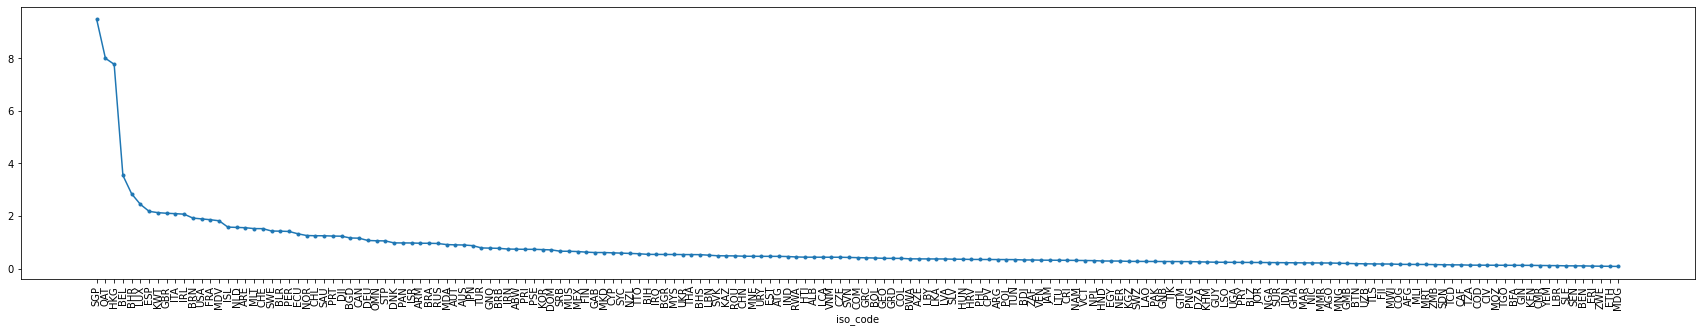

In [108]:
df_sorted_complete.score.plot(figsize=(30,5), style='.-' , rot=90)
xticks=df_sorted_complete.index
plt.xticks(range(0,len(df_sorted_complete.index)),df_sorted_complete.index, size=10)
plt.show()

In [94]:
plt.xticks?

## Lo que vimos

Primero PyOD es un wrapper o funciona como proxy de scikit-learn, es decir utiliza los modelos y las implementaciones de scikit learn para buscar outliers. En el caso de este curso, nosotros solo estamos utilizando herramientas para visualizar outliers y no profundizaremos en k-NN u otras técnicas, serán vistas en los cursos posteriores. por eso utilizamos PyOD para buscar outliers y no parametrizamos k-NN de scikit-learn.

Con respecto al resultado de k-NN y los puntajes. Vemos que Singapur, Qatar y Hong Kong, obtienen los puntajes más altos y son outliers incluso, dentro de los outliers. Para el caso de los 3 siguientes. 

Utilizamos la estandarización de scikit-learn para retornar el $z$-score.  

El $z$-score es calculado restando el promedio ($\mu$) a cada valor y dividirlo por la desviación estandar ($\sigma$).
 
$z= (x - \mu)/\sigma$





